In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read file

In [176]:
# read data
usedcar = pd.read_csv('used_car_price.csv')
usedcar.head()

,make,model,price_usd,year,kilometer,fuel_type,transmission,color,owner,seller_type,engine,max_power,max_torque,drivetrain,length_mm,width_mm,height_mm,seating_capacity,fuel_tank_capacity_l
0,Honda,Amaze 1.2 VX i-VTEC,6060,2017,87150,Petrol,Manual,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,5400,2014,75000,Diesel,Manual,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,2640,2011,67000,Petrol,Manual,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,9588,2019,37500,Petrol,Manual,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],23400,2018,69000,Diesel,Manual,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


## Cleansing Data

In [177]:
usedcar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   make                  2059 non-null   object 
 1   model                 2059 non-null   object 
 2   price_usd             2059 non-null   int64  
 3   year                  2059 non-null   int64  
 4   kilometer             2059 non-null   int64  
 5   fuel_type             2059 non-null   object 
 6   transmission          2059 non-null   object 
 7   color                 2059 non-null   object 
 8   owner                 2059 non-null   object 
 9   seller_type           2059 non-null   object 
 10  engine                1979 non-null   object 
 11  max_power             1979 non-null   object 
 12  max_torque            1979 non-null   object 
 13  drivetrain            1923 non-null   object 
 14  length_mm             1995 non-null   float64
 15  width_mm             

In [178]:
usedcar.isna().sum()

make                      0
model                     0
price_usd                 0
year                      0
kilometer                 0
fuel_type                 0
transmission              0
color                     0
owner                     0
seller_type               0
engine                   80
max_power                80
max_torque               80
drivetrain              136
length_mm                64
width_mm                 64
height_mm                64
seating_capacity         64
fuel_tank_capacity_l    113
dtype: int64

Drop all row that have NULL value

In [179]:
# drop all rows that values are NaN
usedcar = usedcar.dropna()
usedcar

,make,model,price_usd,year,kilometer,fuel_type,transmission,color,owner,seller_type,engine,max_power,max_torque,drivetrain,length_mm,width_mm,height_mm,seating_capacity,fuel_tank_capacity_l
0,Honda,Amaze 1.2 VX i-VTEC,6060,2017,87150,Petrol,Manual,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,5400,2014,75000,Diesel,Manual,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,2640,2011,67000,Petrol,Manual,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,9588,2019,37500,Petrol,Manual,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],23400,2018,69000,Diesel,Manual,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,Maruti Suzuki,Ritz Vxi (ABS) BS-IV,2940,2014,79000,Petrol,Manual,White,Second,Individual,1197 cc,85 bhp @ 6000 rpm,113 Nm @ 4500 rpm,FWD,3775.0,1680.0,1620.0,5.0,43.0
2054,Mahindra,XUV500 W8 [2015-2017],10200,2016,90300,Diesel,Manual,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,3300,2014,83000,Petrol,Manual,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,2880,2013,73000,Petrol,Manual,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0


## Change all data type to number

In [180]:
usedcar['engine'] = usedcar['engine'].str.replace('cc', '').astype(int)

In [182]:
# split 2 value in max_power to 2 column
usedcar['max_power_bhp'] = usedcar['max_power'].str.replace(r' |bhp|rpm', '').str.split('@',n=1, expand=True)[0].astype(float)
usedcar['max_power_rpm'] = usedcar['max_power'].str.replace(r' |bhp|rpm', '').str.split('@',n=1, expand=True)[1]
usedcar['max_power_rpm'] = usedcar['max_power_rpm'].replace(r'^\s*$', np.nan, regex=True)
usedcar.dropna(inplace=True)
usedcar['max_power_rpm'] = usedcar['max_power_rpm'].astype(float)

# split 2 value in max_torque to 2 column
usedcar['max_torque_nm'] = usedcar['max_torque'].str.replace(r' |Nm|rpm', '').str.split('@',n=1, expand=True)[0].astype(float)
usedcar['max_torque_rpm'] = usedcar['max_torque'].str.replace(r' |Nm|rpm', '').str.split('@',n=1, expand=True)[1].astype(float)

usedcar.drop(columns=['max_power', 'max_torque'], inplace=True)


C:\Users\User\AppData\Local\Temp\ipykernel_12756\3464932133.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  usedcar['max_power_bhp'] = usedcar['max_power'].str.replace(r' |bhp|rpm', '').str.split('@',n=1, expand=True)[0].astype(float)
C:\Users\User\AppData\Local\Temp\ipykernel_12756\3464932133.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  usedcar['max_power_rpm'] = usedcar['max_power'].str.replace(r' |bhp|rpm', '').str.split('@',n=1, expand=True)[1]
C:\Users\User\AppData\Local\Temp\ipykernel_12756\3464932133.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  usedcar['max_torque_nm'] = usedcar['max_torque'].str.replace(r' |Nm|rpm', '').str.split('@',n=1, expand=True)[0].astype(float)
C:\Users\User\AppData\Local\Temp\ipykernel_12756\3464932133.py:10: FutureWarning: The default value of regex will change from True to False in a fu

In [183]:
usedcar = usedcar.drop(columns=['model'])
usedcar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1872 entries, 0 to 2057
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   make                  1872 non-null   object 
 1   price_usd             1872 non-null   int64  
 2   year                  1872 non-null   int64  
 3   kilometer             1872 non-null   int64  
 4   fuel_type             1872 non-null   object 
 5   transmission          1872 non-null   object 
 6   color                 1872 non-null   object 
 7   owner                 1872 non-null   object 
 8   seller_type           1872 non-null   object 
 9   engine                1872 non-null   int32  
 10  drivetrain            1872 non-null   object 
 11  length_mm             1872 non-null   float64
 12  width_mm              1872 non-null   float64
 13  height_mm             1872 non-null   float64
 14  seating_capacity      1872 non-null   float64
 15  fuel_tank_capacity_l 

In [184]:
import sklearn
from sklearn.preprocessing import OrdinalEncoder

# ordinal encoder
usedcar.reset_index(inplace=True)
usedcar_obj = usedcar.select_dtypes("object")
usedcar_num = usedcar.select_dtypes("number")

ord_enc = OrdinalEncoder()
temp = ord_enc.fit_transform(usedcar_obj)
usedcar_obj = pd.DataFrame(temp, columns= usedcar_obj.columns)

usedcar_df = pd.concat([usedcar_obj, usedcar_num], axis=1)
usedcar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   make                  1872 non-null   float64
 1   fuel_type             1872 non-null   float64
 2   transmission          1872 non-null   float64
 3   color                 1872 non-null   float64
 4   owner                 1872 non-null   float64
 5   seller_type           1872 non-null   float64
 6   drivetrain            1872 non-null   float64
 7   index                 1872 non-null   int64  
 8   price_usd             1872 non-null   int64  
 9   year                  1872 non-null   int64  
 10  kilometer             1872 non-null   int64  
 11  engine                1872 non-null   int32  
 12  length_mm             1872 non-null   float64
 13  width_mm              1872 non-null   float64
 14  height_mm             1872 non-null   float64
 15  seating_capacity     

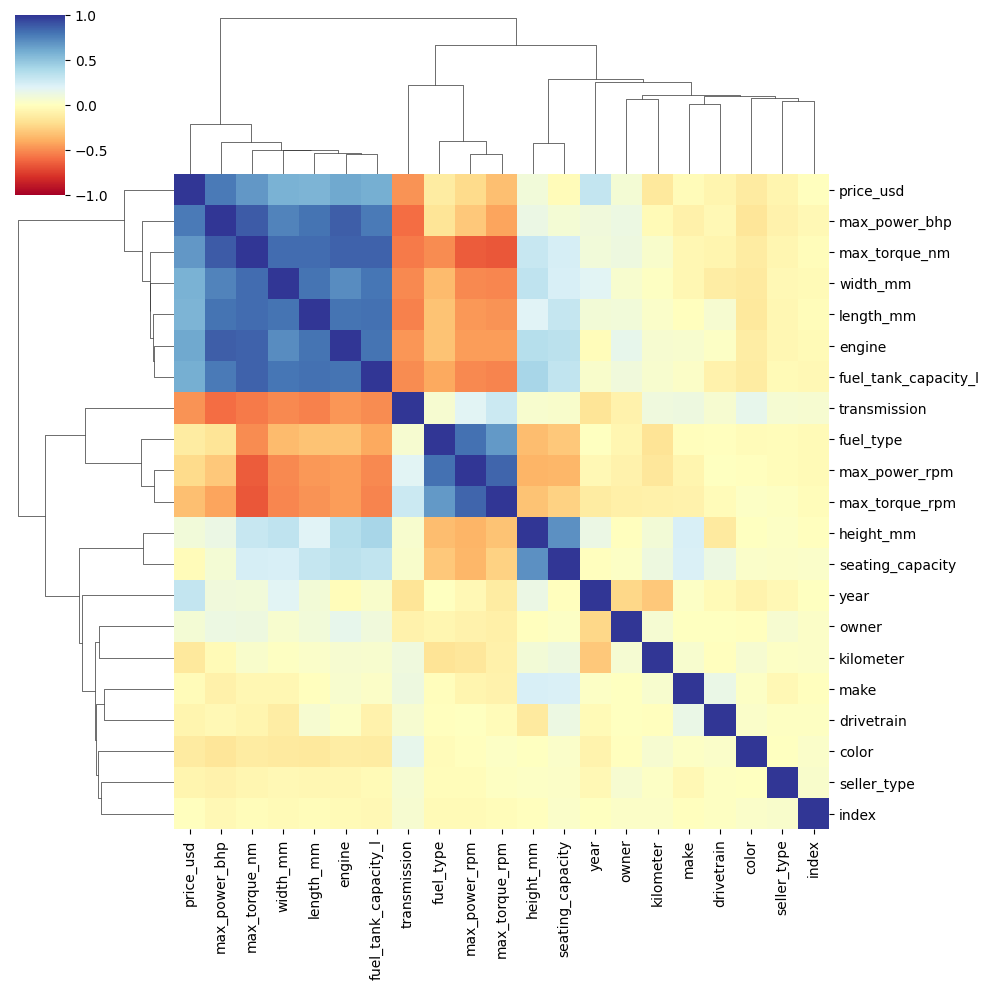

In [185]:
# plot cluster map
import seaborn as sns
ax = sns.clustermap(usedcar_df.corr(), cmap='RdYlBu', vmin=-1, vmax=1)
plt.show()

In [186]:
usedcar_df.corr()

,make,fuel_type,transmission,color,owner,seller_type,drivetrain,index,price_usd,year,...,engine,length_mm,width_mm,height_mm,seating_capacity,fuel_tank_capacity_l,max_power_bhp,max_power_rpm,max_torque_nm,max_torque_rpm
make,1.000000,-0.014460,0.112940,0.022737,0.007571,-0.044940,0.136873,-0.002850,-0.027611,0.022668,...,0.051986,-0.005299,-0.052218,0.232013,0.223627,0.025365,-0.089769,-0.069229,-0.048751,-0.085873
fuel_type,-0.014460,1.000000,0.057462,-0.027786,-0.057010,-0.019457,-0.003137,-0.035118,-0.122722,0.006945,...,-0.319255,-0.313529,-0.345251,-0.341481,-0.292191,-0.409347,-0.169789,0.810825,-0.505503,0.670511
transmission,0.112940,0.057462,1.000000,0.155349,-0.083924,0.065716,0.060971,0.055056,-0.476598,-0.170027,...,-0.472037,-0.536716,-0.512415,0.052473,0.039494,-0.505873,-0.596086,0.186641,-0.561844,0.275229
color,0.022737,-0.027786,0.155349,1.000000,-0.001332,0.006740,0.033219,0.031256,-0.129146,-0.070792,...,-0.113561,-0.144105,-0.138432,0.001763,0.038381,-0.118950,-0.157759,-0.006988,-0.119214,0.022415
owner,0.007571,-0.057010,-0.083924,-0.001332,1.000000,0.056260,0.003112,0.030069,0.073377,-0.234279,...,0.155883,0.093116,0.048296,-0.004676,0.021476,0.096859,0.121863,-0.083028,0.111872,-0.098567
seller_type,-0.044940,-0.019457,0.065716,0.006740,0.056260,1.000000,0.008324,0.039412,-0.066151,-0.040106,...,-0.053353,-0.052045,-0.043622,0.021566,0.029286,-0.038628,-0.082022,-0.016274,-0.055462,0.015451
drivetrain,0.136873,-0.003137,0.060971,0.033219,0.003112,0.008324,1.000000,0.008926,-0.065635,-0.032910,...,0.022511,0.060190,-0.116227,-0.137410,0.117457,-0.085601,-0.043128,0.002440,-0.070172,-0.025303
index,-0.002850,-0.035118,0.055056,0.031256,0.030069,0.039412,0.008926,1.000000,-0.006196,0.005849,...,-0.036878,-0.017956,-0.032006,-0.001944,0.034905,-0.039263,-0.044299,-0.035031,-0.022422,-0.021754
price_usd,-0.027611,-0.122722,-0.476598,-0.129146,0.073377,-0.066151,-0.065635,-0.006196,1.000000,0.309409,...,0.609628,0.568875,0.577137,0.092941,-0.024934,0.586104,0.776988,-0.211285,0.676819,-0.333332
year,0.022668,0.006945,-0.170027,-0.070792,-0.234279,-0.040106,-0.032910,0.005849,0.309409,1.000000,...,-0.018050,0.084772,0.182503,0.126697,-0.000514,0.044511,0.099874,-0.046239,0.091631,-0.121097


## Train data using Linear Regression

In [205]:
# Target column is price_usd
X = usedcar_df.drop(columns='price_usd')
y = usedcar_df['price_usd']

## Split data to train and test

In [188]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [189]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [190]:
regressor.fit(X_train,y_train)

LinearRegression()

In [191]:
regressor.score(X_train,y_train)

0.687995387477548

In [192]:
pd.DataFrame(dict(Feature = X.columns,
                  Coefficient = regressor.coef_))

,Feature,Coefficient
0,make,274.658834
1,fuel_type,-800.041640
2,transmission,1879.744670
3,color,65.026310
4,owner,2693.806185
5,seller_type,938.649000
6,drivetrain,425.164492
7,index,1.205106
8,year,2185.241824
9,kilometer,-0.022965


In [193]:
y_hat = regressor.predict(X_test)
y_hat

array([-3.57416276e+03,  8.73305928e+03,  5.52676166e+04,  1.22330010e+04,
       -7.88863392e+03,  1.08387485e+04,  6.08370443e+03,  1.96084141e+04,
        2.60942337e+03,  3.71025200e+04,  3.68309956e+04,  8.06113032e+03,
        1.41385110e+04,  4.17332399e+04,  3.76122138e+04,  2.65128944e+04,
        2.58602457e+04,  2.94619168e+04,  1.56605891e+04,  1.02766560e+04,
       -8.46365047e+03,  2.05070777e+03,  4.61320993e+03,  9.51203069e+03,
        1.22810865e+04, -4.10116028e+02,  6.97859423e+03, -3.64427186e+03,
        9.91529938e+03,  4.47229186e+04,  1.50846892e+04, -1.45238933e+03,
        1.19236281e+02, -8.75464869e+03,  7.75327869e+04,  2.14809985e+04,
        1.27896918e+04,  9.24646518e+03, -8.03193713e+03,  3.40860293e+04,
        1.02074484e+05, -7.97555579e+03,  7.57032475e+03,  1.54767452e+04,
       -9.20132175e+02,  3.13354584e+04,  1.21382537e+04, -2.49903080e+04,
        6.45896992e+03,  1.90131959e+04, -1.17404605e+02, -3.14287729e+03,
        2.19010487e+04,  

In [207]:
final = pd.concat([X_test, y_test], axis = 'columns')
final.reset_index(inplace=True)
final.drop(columns="level_0", inplace=True)
final = pd.concat([final, pd.Series(y_hat, name = 'predicted')], axis = 'columns')
final.head(20)

,make,fuel_type,transmission,color,owner,seller_type,drivetrain,index,year,kilometer,...,width_mm,height_mm,seating_capacity,fuel_tank_capacity_l,max_power_bhp,max_power_rpm,max_torque_nm,max_torque_rpm,price_usd,predicted
0,18.0,5.0,1.0,14.0,0.0,2.0,1.0,1864,2016,17000,...,1490.0,1475.0,5.0,35.0,47.0,6000.0,69.0,3500.0,3420,-3574.162761
1,8.0,5.0,1.0,14.0,0.0,2.0,1.0,1349,2019,31000,...,1734.0,1505.0,5.0,45.0,82.0,6000.0,115.0,4000.0,7500,8733.059280
2,20.0,2.0,0.0,1.0,0.0,2.0,2.0,1603,2021,13000,...,1860.0,1494.0,5.0,80.0,192.0,3800.0,400.0,1600.0,89700,55267.616609
3,7.0,5.0,1.0,14.0,0.0,2.0,1.0,301,2019,17000,...,1734.0,1601.0,5.0,40.0,89.0,6000.0,110.0,4800.0,10800,12233.001005
4,17.0,2.0,1.0,14.0,0.0,2.0,2.0,458,2019,38000,...,1820.0,1930.0,7.0,60.0,75.0,3200.0,200.0,1400.0,13452,-7888.633917
5,28.0,5.0,1.0,1.0,0.0,2.0,1.0,1142,2018,91460,...,1647.0,1535.0,5.0,35.0,84.0,6000.0,114.0,3500.0,4800,10838.748519
6,8.0,5.0,1.0,7.0,0.0,2.0,1.0,268,2018,57847,...,1660.0,1520.0,5.0,43.0,81.0,6000.0,114.0,4000.0,6828,6083.704429
7,7.0,5.0,0.0,4.0,0.0,2.0,1.0,420,2021,13000,...,1695.0,1495.0,5.0,40.0,118.0,6600.0,145.0,4600.0,17400,19608.414133
8,18.0,2.0,1.0,7.0,0.0,2.0,1.0,353,2018,68500,...,1735.0,1515.0,5.0,37.0,74.0,4000.0,190.0,2000.0,7080,2609.423366
9,29.0,2.0,0.0,14.0,0.0,2.0,2.0,219,2018,7800,...,1855.0,1835.0,7.0,80.0,174.0,3400.0,450.0,1600.0,43200,37102.520034


## Using StandardScaler

In [195]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_df = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X_df

,make,fuel_type,transmission,color,owner,seller_type,drivetrain,index,year,kilometer,engine,length_mm,width_mm,height_mm,seating_capacity,fuel_tank_capacity_l,max_power_bhp,max_power_rpm,max_torque_nm,max_torque_rpm
0,-0.869888,1.052951,0.897333,-0.582408,-0.447973,-4.966202,-0.048128,-1.733724,0.090237,0.577975,-0.765224,-0.668606,-0.668785,-0.623775,-0.365979,-1.135302,-0.660616,1.055262,-0.976837,1.536538
1,0.401059,-0.858288,0.897333,0.844110,1.484299,0.172952,-0.048128,-1.732038,-0.865934,0.371344,-0.686253,-0.657146,-0.554611,-0.252471,-0.365979,-0.673875,-0.864982,-0.761796,-0.392080,-0.526923
2,-0.754347,1.052951,0.897333,-0.378620,-0.447973,0.172952,-0.048128,-1.730352,-1.822106,0.235290,-0.766803,-1.596876,-1.315773,-0.289601,-0.365979,-1.135302,-0.786380,1.055262,-0.949679,1.123845
3,1.672007,1.052951,0.897333,0.436534,-0.447973,0.172952,-0.048128,-1.728666,0.727684,-0.266406,-0.766803,-0.657146,-0.174030,-0.586645,-0.365979,-1.003466,-0.739219,1.055262,-0.947960,1.288922
4,1.672007,-0.858288,0.897333,-0.582408,-0.447973,0.172952,1.790563,-1.726980,0.408961,0.269304,1.122187,1.038952,0.472957,1.529789,2.111825,0.183060,0.298329,-1.306913,0.712463,-1.022154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,0.401059,1.052951,0.897333,0.844110,1.484299,0.172952,-0.048128,1.727830,-0.865934,0.439370,-0.766803,-1.161392,-0.668785,0.230224,-0.365979,-0.607957,-0.692057,1.055262,-0.947960,1.536538
1868,0.285519,-0.858288,0.897333,0.844110,-0.447973,0.172952,-0.048128,1.729516,-0.228487,0.631546,0.784190,0.695148,0.929654,1.455528,2.111825,1.171832,0.141125,-0.988928,0.618613,-0.857077
1869,-0.754347,1.052951,0.897333,0.844110,1.484299,0.172952,-0.048128,1.731202,-0.865934,0.507397,-1.371722,-1.803158,-1.658295,-0.660905,-0.365979,-1.333056,-1.163670,0.600998,-1.222291,1.123845
1870,-0.985429,1.052951,0.897333,0.640322,-0.447973,0.172952,-0.048128,1.732888,-1.184658,0.337330,-0.768383,-1.115551,-0.668785,-1.203009,-0.365979,-0.476121,-0.927864,1.282395,-1.027372,1.123845


In [196]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_df,y)

LinearRegression()

In [197]:
from sklearn.metrics import r2_score
r2_score(y_pred=regressor.predict(X_df), y_true=y)

0.6863331917154742

In [198]:
pd.DataFrame(dict(Feature = X_df.columns,
                  Coefficient = regressor.coef_))

,Feature,Coefficient
0,make,2272.312751
1,fuel_type,-1088.262646
2,transmission,693.441639
3,color,195.143932
4,owner,1280.504899
5,seller_type,221.686022
6,drivetrain,146.682106
7,index,820.395501
8,year,6260.842280
9,kilometer,-1619.419730


## Using ols

In [199]:
from statsmodels.formula.api import ols

model = ols('price_usd ~ max_power_bhp',usedcar_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_usd   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     2849.
Date:                Fri, 07 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:36:54   Log-Likelihood:                -21033.
No. Observations:                1872   AIC:                         4.207e+04
Df Residuals:                    1870   BIC:                         4.208e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.527e+04    958.661    -26.359      0.000   -2.71e+04   -2.34e+04
max_power_bhp   355.6954      6.664     53.374      0.000     342.625     368.766
==============================================================================
Omnibus:                     1806.298   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           224495.716
Skew:                           4.184   Prob(JB):                         0.00
Kurtosis:                      55.992   Cond. No.                         325.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [200]:
res = model.predict(usedcar_df)
res

0        5676.134181
1        1052.093900
2        2830.570931
3        3897.657150
4       27373.553961
            ...     
1867     4964.743369
1868    23816.599899
1869    -5706.118818
1870     -370.687725
1871    41601.370210
Length: 1872, dtype: float64

<Axes: >

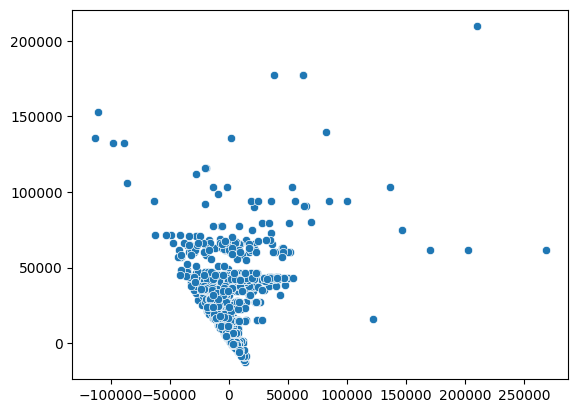

In [201]:
sns.scatterplot(x =model.resid, y = res)

In [202]:
model = ols('price_usd ~ max_power_bhp + transmission',usedcar_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_usd   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     1425.
Date:                Fri, 07 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:36:54   Log-Likelihood:                -21032.
No. Observations:                1872   AIC:                         4.207e+04
Df Residuals:                    1869   BIC:                         4.209e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.386e+04   1556.747    -15.326      0.000   -2.69e+04   -2.08e+04
max_power_bhp   350.0038      8.299     42.173      0.000     333.727     366.281
transmission  -1221.9004   1062.060     -1.151      0.250   -3304.848     861.047
==============================================================================
Omnibus:                     1819.522   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           228273.148
Skew:                           4.234   Prob(JB):                         0.00
Kurtosis:                      56.431   Cond. No.                         610.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""